In [1]:
# X (Twitter) Analytics: Optimal Posting Days Analysis
# Data Science Project using Python and Pandas
# CELL 1: Import Libraries and Setup

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("📊 X (Twitter) Analytics: Optimal Posting Days Analysis")
print("=" * 60)
print("Libraries imported successfully!")

📊 X (Twitter) Analytics: Optimal Posting Days Analysis
Libraries imported successfully!


In [2]:
# CELL 2: Load and Initial Data Exploration
# Load the CSV data

df = pd.read_csv('account_analytics_content_2025-05-22_2025-08-19_notext.csv')

print("🔍 Dataset Overview:")
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print("\n📈 First few rows:")
print(df.head())

print("\n📊 Basic Statistics:")
print(df.describe())

print("\n🔍 Data Types:")
print(df.dtypes)

print("\n❓ Missing Values:")
print(df.isnull().sum())

🔍 Dataset Overview:
Shape: (351, 15)
Columns: ['Post id', 'Date', 'Impressions', 'Likes', 'Engagements', 'Bookmarks', 'Shares', 'New follows', 'Replies', 'Reposts', 'Profile visits', 'Detail Expands', 'URL Clicks', 'Hashtag Clicks', 'Permalink Clicks']

📈 First few rows:
        Post id               Date  Impressions  Likes  Engagements  \
0  1.957910e+18  Tue, Aug 19, 2025          658     18           70   
1  1.957890e+18  Tue, Aug 19, 2025          880     34           82   
2  1.957870e+18  Tue, Aug 19, 2025         1000     33           92   
3  1.957840e+18  Tue, Aug 19, 2025         1862     64          201   
4  1.957760e+18  Tue, Aug 19, 2025         4210    341          820   

   Bookmarks  Shares  New follows  Replies  Reposts  Profile visits  \
0          0       0            0       26        1               9   
1          0       0            0       16        0               4   
2          0       0            0       24        3              12   
3          3     

In [3]:
# CELL 3: Data Cleaning and Feature Engineering

# Create a copy for processing
data = df.copy()

# Convert date column to datetime
data['Date'] = pd.to_datetime(data['Date'], format='%a, %b %d, %Y')

# Extract day of week
data['DayOfWeek'] = data['Date'].dt.day_name()
data['DayOfWeek_Num'] = data['Date'].dt.dayofweek  # Monday=0, Sunday=6

# Calculate engagement metrics
data['Engagement_Rate'] = (data['Engagements'] / data['Impressions'] * 100).fillna(0)
data['Like_Rate'] = (data['Likes'] / data['Impressions'] * 100).fillna(0)
data['Reply_Rate'] = (data['Replies'] / data['Impressions'] * 100).fillna(0)
data['Repost_Rate'] = (data['Reposts'] / data['Impressions'] * 100).fillna(0)

# Handle any infinite values
data = data.replace([np.inf, -np.inf], 0)

print("✅ Data Cleaning Complete!")
print(f"Date range: {data['Date'].min()} to {data['Date'].max()}")
print(f"Total posts: {len(data)}")
print(f"Unique days: {data['Date'].nunique()}")

print("\n📊 New Calculated Metrics:")
print(data[['Engagement_Rate', 'Like_Rate', 'Reply_Rate', 'Repost_Rate']].describe())

✅ Data Cleaning Complete!
Date range: 2025-05-22 00:00:00 to 2025-08-19 00:00:00
Total posts: 351
Unique days: 89

📊 New Calculated Metrics:
       Engagement_Rate   Like_Rate  Reply_Rate  Repost_Rate
count       351.000000  351.000000  351.000000   351.000000
mean          9.438480    3.953572    2.975426     0.190059
std           5.871546    2.966880    2.933644     0.458267
min           0.000000    0.000000    0.000000     0.000000
25%           5.201525    1.941282    0.693290     0.000000
50%           7.868020    3.243458    1.960784     0.092851
75%          13.923110    6.078344    5.505815     0.175562
max          30.769231   22.222222   10.216642     5.263158


In [4]:
# CELL 4: Day of Week Analysis

# Group by day of week and calculate statistics
day_stats = data.groupby('DayOfWeek').agg({
    'Post id': 'count',
    'Impressions': ['sum', 'mean', 'median'],
    'Likes': ['sum', 'mean', 'median'],
    'Engagements': ['sum', 'mean', 'median'],
    'Replies': ['sum', 'mean', 'median'],
    'Reposts': ['sum', 'mean', 'median'],
    'Engagement_Rate': ['mean', 'median', 'std'],
    'Like_Rate': ['mean', 'median', 'std'],
    'Reply_Rate': ['mean', 'median', 'std']
}).round(2)

# Flatten column names
day_stats.columns = [f'{col[1]}_{col[0]}' if col[1] != '' else col[0] for col in day_stats.columns]
day_stats = day_stats.rename(columns={'count_Post id': 'Total_Posts'})

# Reorder days of week properly
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_stats = day_stats.reindex(day_order)

print("📅 Daily Performance Statistics:")
print(day_stats)

📅 Daily Performance Statistics:
           Total_Posts  sum_Impressions  mean_Impressions  median_Impressions  \
DayOfWeek                                                                       
Monday              52           159625           3069.71              3213.5   
Tuesday             57           150553           2641.28              1982.0   
Wednesday           48           148586           3095.54              2404.5   
Thursday            66           138341           2096.08              1389.0   
Friday              42           133208           3171.62              2462.0   
Saturday            38           130529           3434.97              3117.0   
Sunday              48           213218           4442.04              3659.0   

           sum_Likes  mean_Likes  median_Likes  sum_Engagements  \
DayOfWeek                                                         
Monday          6653      127.94          91.0            16305   
Tuesday         6416      112.56     

In [5]:
# CELL 5: Create Summary Statistics DataFrame

# Create a clean summary table
summary_stats = pd.DataFrame({
    'Day': day_order,
    'Total_Posts': day_stats['Total_Posts'].values,
    'Avg_Impressions': day_stats['mean_Impressions'].values,
    'Avg_Engagements': day_stats['mean_Engagements'].values,
    'Avg_Likes': day_stats['mean_Likes'].values,
    'Engagement_Rate_Mean': day_stats['mean_Engagement_Rate'].values,
    'Like_Rate_Mean': day_stats['mean_Like_Rate'].values,
    'Reply_Rate_Mean': day_stats['mean_Reply_Rate'].values
})

print("📋 Clean Summary Statistics:")
print(summary_stats)

# Rank days by different metrics
print("\n🏆 Rankings by Different Metrics:")
print("\n📈 Best Days for Engagement Rate:")
engagement_ranking = summary_stats.sort_values('Engagement_Rate_Mean', ascending=False)
for i, (_, row) in enumerate(engagement_ranking.head(3).iterrows(), 1):
    print(f"{i}. {row['Day']}: {row['Engagement_Rate_Mean']:.2f}%")

print("\n👁️ Best Days for Average Impressions:")
impression_ranking = summary_stats.sort_values('Avg_Impressions', ascending=False)
for i, (_, row) in enumerate(impression_ranking.head(3).iterrows(), 1):
    print(f"{i}. {row['Day']}: {row['Avg_Impressions']:.0f}")

print("\n❤️ Best Days for Like Rate:")
like_ranking = summary_stats.sort_values('Like_Rate_Mean', ascending=False)
for i, (_, row) in enumerate(like_ranking.head(3).iterrows(), 1):
    print(f"{i}. {row['Day']}: {row['Like_Rate_Mean']:.2f}%")

📋 Clean Summary Statistics:
         Day  Total_Posts  Avg_Impressions  Avg_Engagements  Avg_Likes  \
0     Monday           52          3069.71           313.56     127.94   
1    Tuesday           57          2641.28           277.56     112.56   
2  Wednesday           48          3095.54           307.08     124.10   
3   Thursday           66          2096.08           222.36      93.64   
4     Friday           42          3171.62           344.17     136.86   
5   Saturday           38          3434.97           366.45     151.37   
6     Sunday           48          4442.04           391.96     152.25   

   Engagement_Rate_Mean  Like_Rate_Mean  Reply_Rate_Mean  
0                  8.73            3.64             2.93  
1                  9.36            3.95             2.97  
2                  9.33            3.80             3.04  
3                  9.02            3.68             2.43  
4                 10.03            4.01             3.39  
5                 10.18  

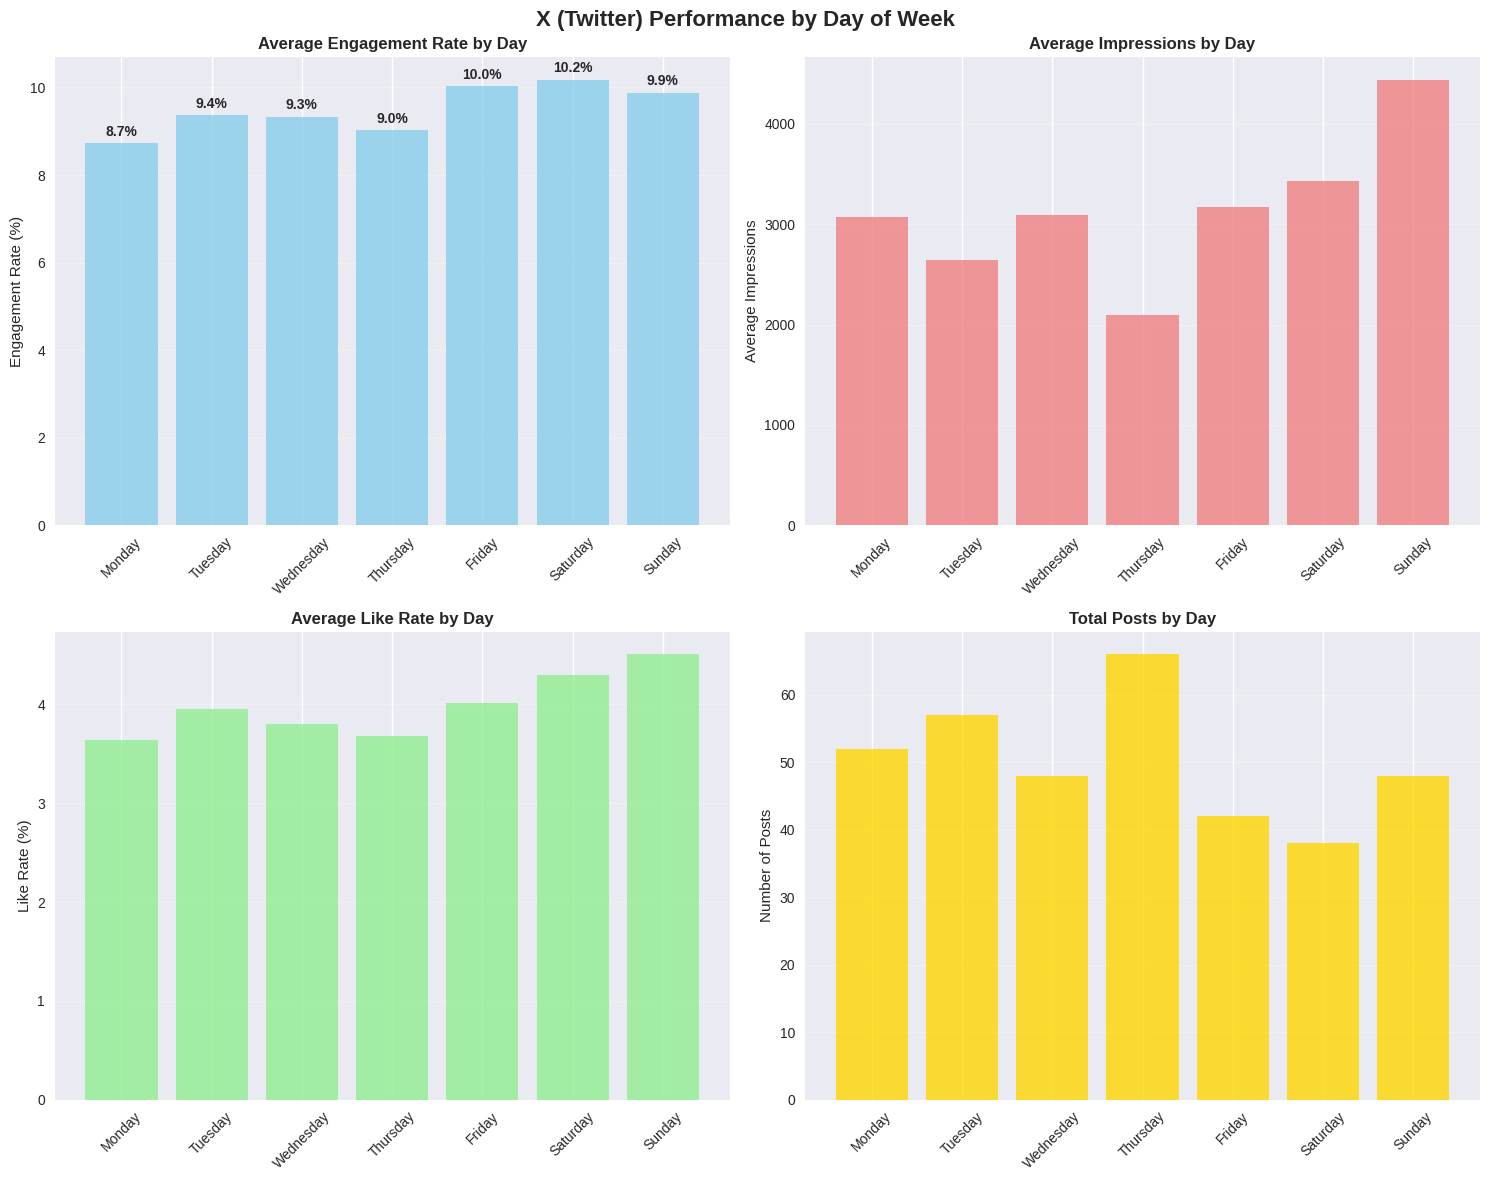

In [6]:
# CELL 6: Visualization - Engagement Rate by Day

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('X (Twitter) Performance by Day of Week', fontsize=16, fontweight='bold')

# 1. Engagement Rate
axes[0, 0].bar(summary_stats['Day'], summary_stats['Engagement_Rate_Mean'], 
               color='skyblue', alpha=0.8)
axes[0, 0].set_title('Average Engagement Rate by Day', fontweight='bold')
axes[0, 0].set_ylabel('Engagement Rate (%)')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, v in enumerate(summary_stats['Engagement_Rate_Mean']):
    axes[0, 0].text(i, v + 0.1, f'{v:.1f}%', ha='center', va='bottom', fontweight='bold')

# 2. Average Impressions
axes[0, 1].bar(summary_stats['Day'], summary_stats['Avg_Impressions'], 
               color='lightcoral', alpha=0.8)
axes[0, 1].set_title('Average Impressions by Day', fontweight='bold')
axes[0, 1].set_ylabel('Average Impressions')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(axis='y', alpha=0.3)

# 3. Like Rate
axes[1, 0].bar(summary_stats['Day'], summary_stats['Like_Rate_Mean'], 
               color='lightgreen', alpha=0.8)
axes[1, 0].set_title('Average Like Rate by Day', fontweight='bold')
axes[1, 0].set_ylabel('Like Rate (%)')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(axis='y', alpha=0.3)

# 4. Total Posts
axes[1, 1].bar(summary_stats['Day'], summary_stats['Total_Posts'], 
               color='gold', alpha=0.8)
axes[1, 1].set_title('Total Posts by Day', fontweight='bold')
axes[1, 1].set_ylabel('Number of Posts')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

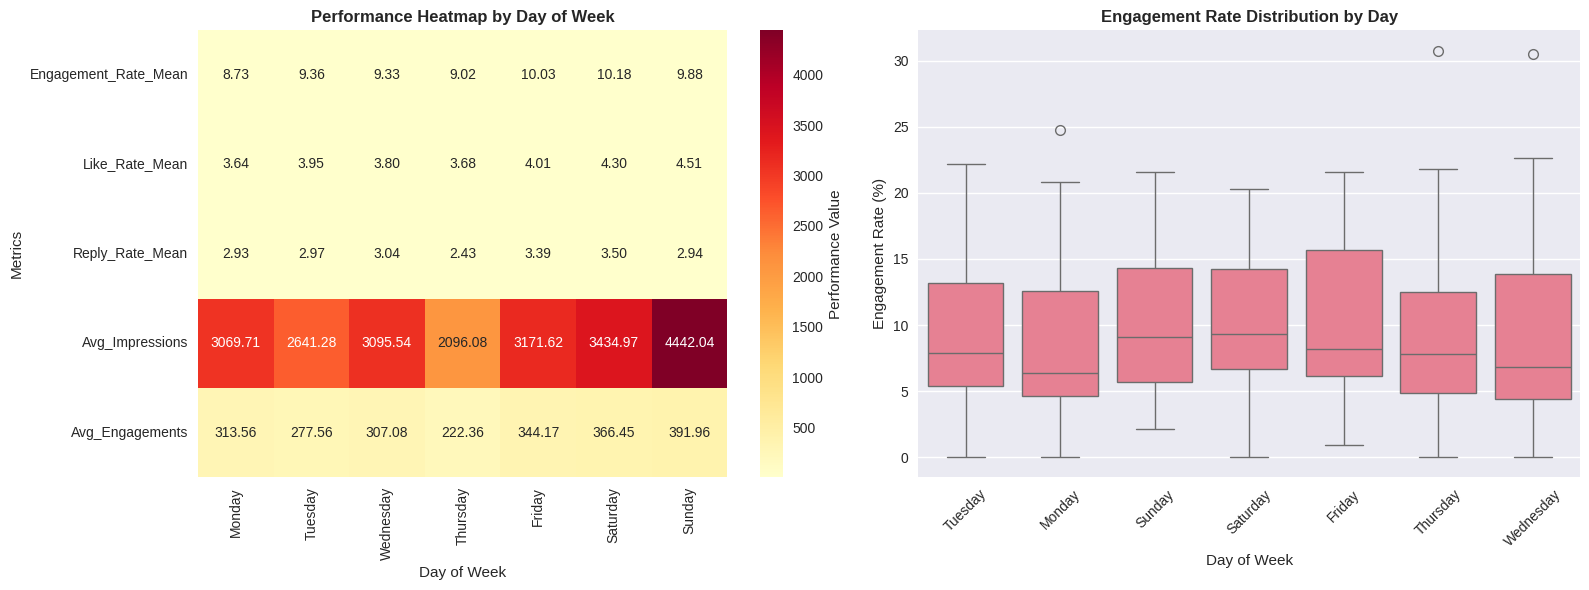

In [7]:
# CELL 7: Advanced Visualization - Heatmap and Correlations

# Create correlation heatmap
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Heatmap of daily performance metrics
heatmap_data = summary_stats.set_index('Day')[['Engagement_Rate_Mean', 'Like_Rate_Mean', 
                                               'Reply_Rate_Mean', 'Avg_Impressions', 
                                               'Avg_Engagements']].T

sns.heatmap(heatmap_data, annot=True, fmt='.2f', cmap='YlOrRd', 
            cbar_kws={'label': 'Performance Value'}, ax=axes[0])
axes[0].set_title('Performance Heatmap by Day of Week', fontweight='bold')
axes[0].set_xlabel('Day of Week')
axes[0].set_ylabel('Metrics')

# Box plot for engagement rate distribution
data_melted = data[['DayOfWeek', 'Engagement_Rate']].copy()
sns.boxplot(data=data_melted, x='DayOfWeek', y='Engagement_Rate', ax=axes[1])
axes[1].set_title('Engagement Rate Distribution by Day', fontweight='bold')
axes[1].set_xlabel('Day of Week')
axes[1].set_ylabel('Engagement Rate (%)')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [8]:
# CELL 8: Statistical Analysis and Recommendations

from scipy import stats

print("📊 Statistical Analysis:")
print("=" * 50)

# Find the best performing day for each metric
best_engagement_day = summary_stats.loc[summary_stats['Engagement_Rate_Mean'].idxmax(), 'Day']
best_impression_day = summary_stats.loc[summary_stats['Avg_Impressions'].idxmax(), 'Day']
best_like_day = summary_stats.loc[summary_stats['Like_Rate_Mean'].idxmax(), 'Day']
most_active_day = summary_stats.loc[summary_stats['Total_Posts'].idxmax(), 'Day']

print(f"🏆 Best day for Engagement Rate: {best_engagement_day} ({summary_stats.loc[summary_stats['Day']==best_engagement_day, 'Engagement_Rate_Mean'].iloc[0]:.2f}%)")
print(f"👁️ Best day for Impressions: {best_impression_day} ({summary_stats.loc[summary_stats['Day']==best_impression_day, 'Avg_Impressions'].iloc[0]:.0f})")
print(f"❤️ Best day for Like Rate: {best_like_day} ({summary_stats.loc[summary_stats['Day']==best_like_day, 'Like_Rate_Mean'].iloc[0]:.2f}%)")
print(f"📅 Most active posting day: {most_active_day} ({summary_stats.loc[summary_stats['Day']==most_active_day, 'Total_Posts'].iloc[0]:.0f} posts)")

# ANOVA test to check if there's significant difference between days
days_data = [data[data['DayOfWeek'] == day]['Engagement_Rate'].values for day in day_order]
f_stat, p_value = stats.f_oneway(*days_data)

print(f"\n📈 ANOVA Test Results:")
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")
if p_value < 0.05:
    print("✅ Significant difference found between days (p < 0.05)")
else:
    print("❌ No significant difference between days (p >= 0.05)")

# Calculate coefficient of variation for each day
cv_by_day = data.groupby('DayOfWeek')['Engagement_Rate'].agg(['mean', 'std']).round(4)
cv_by_day['cv'] = (cv_by_day['std'] / cv_by_day['mean']) * 100
cv_by_day = cv_by_day.reindex(day_order)

print(f"\n📊 Engagement Rate Consistency (Coefficient of Variation):")
print("Lower CV = More consistent performance")
for day in day_order:
    cv = cv_by_day.loc[day, 'cv']
    print(f"{day}: {cv:.1f}%")

📊 Statistical Analysis:
🏆 Best day for Engagement Rate: Saturday (10.18%)
👁️ Best day for Impressions: Sunday (4442)
❤️ Best day for Like Rate: Sunday (4.51%)
📅 Most active posting day: Thursday (66 posts)

📈 ANOVA Test Results:
F-statistic: 0.4003
P-value: 0.8787
❌ No significant difference between days (p >= 0.05)

📊 Engagement Rate Consistency (Coefficient of Variation):
Lower CV = More consistent performance
Monday: 69.3%
Tuesday: 63.6%
Wednesday: 70.9%
Thursday: 69.6%
Friday: 52.9%
Saturday: 52.9%
Sunday: 53.0%


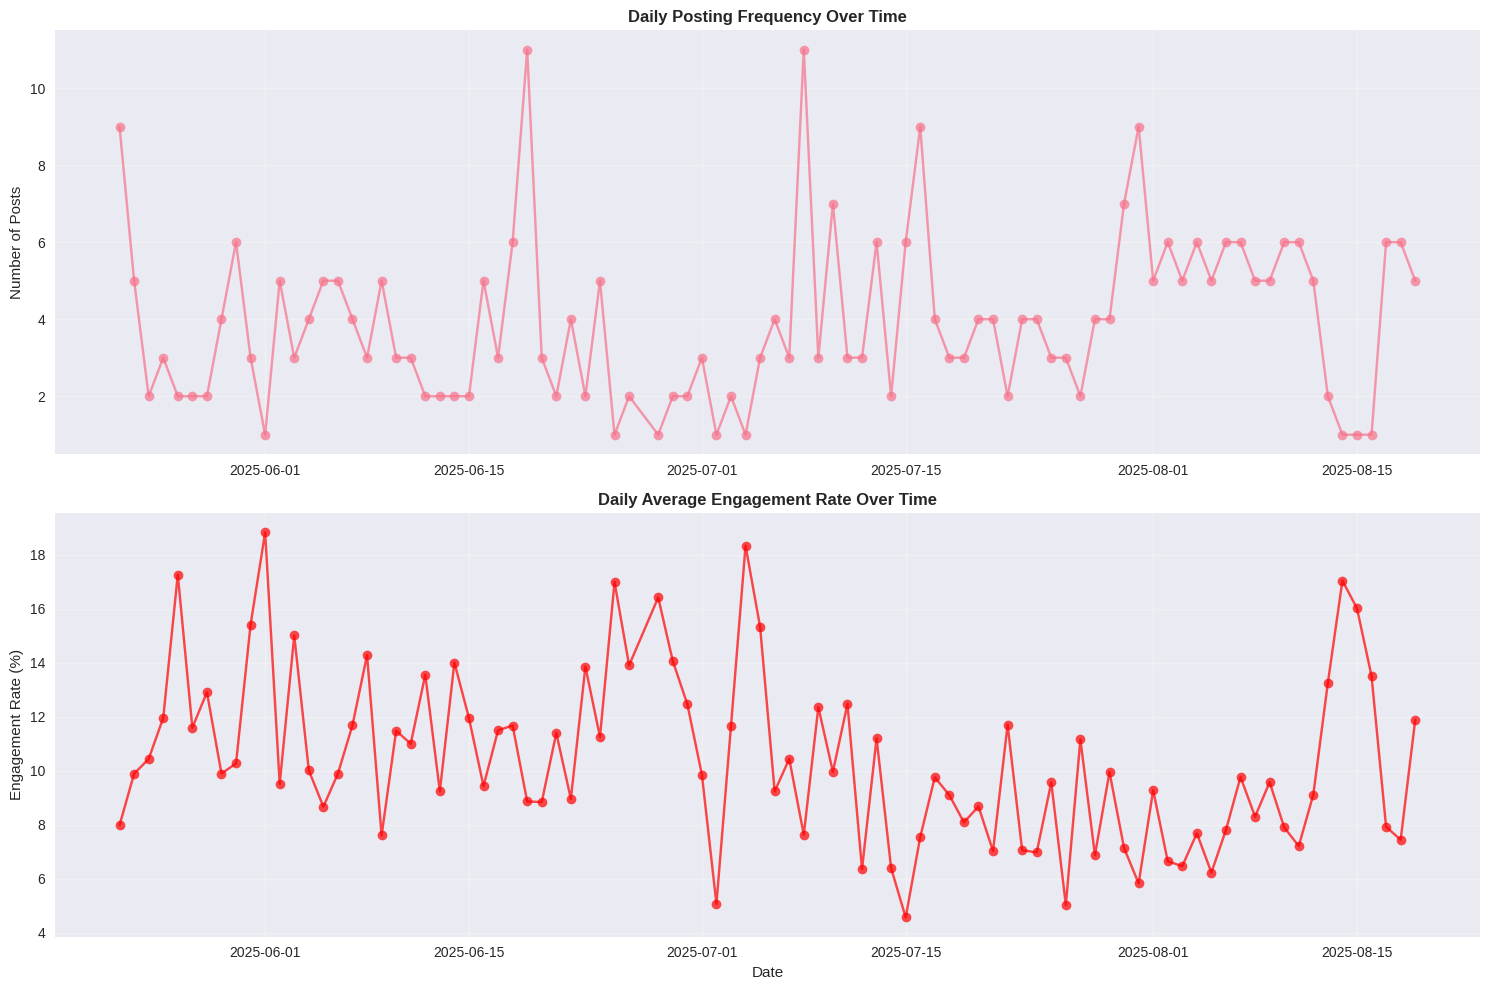

In [9]:
# CELL 9: Time Series Analysis

# Daily posting frequency over time
daily_posts = data.groupby('Date').size().reset_index(name='Posts_Count')
daily_engagement = data.groupby('Date')['Engagement_Rate'].mean().reset_index()

fig, axes = plt.subplots(2, 1, figsize=(15, 10))

# Posts over time
axes[0].plot(daily_posts['Date'], daily_posts['Posts_Count'], marker='o', alpha=0.7)
axes[0].set_title('Daily Posting Frequency Over Time', fontweight='bold')
axes[0].set_ylabel('Number of Posts')
axes[0].grid(alpha=0.3)

# Engagement rate over time
axes[1].plot(daily_engagement['Date'], daily_engagement['Engagement_Rate'], 
             color='red', marker='o', alpha=0.7)
axes[1].set_title('Daily Average Engagement Rate Over Time', fontweight='bold')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Engagement Rate (%)')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [10]:
# CELL 10: Final Recommendations and Export Results

print("🎯 FINAL RECOMMENDATIONS:")
print("=" * 50)

# Create a comprehensive recommendation report
recommendations = {
    'metric': ['Engagement Rate', 'Impressions', 'Like Rate', 'Consistency'],
    'best_day': [best_engagement_day, best_impression_day, best_like_day, 
                 cv_by_day['cv'].idxmin()],
    'value': [f"{summary_stats.loc[summary_stats['Day']==best_engagement_day, 'Engagement_Rate_Mean'].iloc[0]:.2f}%",
              f"{summary_stats.loc[summary_stats['Day']==best_impression_day, 'Avg_Impressions'].iloc[0]:.0f}",
              f"{summary_stats.loc[summary_stats['Day']==best_like_day, 'Like_Rate_Mean'].iloc[0]:.2f}%",
              f"{cv_by_day['cv'].min():.1f}% CV"]
}

rec_df = pd.DataFrame(recommendations)
print(rec_df.to_string(index=False))

print(f"\n📋 KEY INSIGHTS:")
print(f"• Total posts analyzed: {len(data)}")
print(f"• Date range: {data['Date'].min().strftime('%Y-%m-%d')} to {data['Date'].max().strftime('%Y-%m-%d')}")
print(f"• Average engagement rate: {data['Engagement_Rate'].mean():.2f}%")
print(f"• Best overall day: {best_engagement_day} (highest engagement rate)")
print(f"• Most consistent day: {cv_by_day['cv'].idxmin()} (lowest variation)")

# Export results to CSV
summary_stats.to_csv('twitter_daily_performance_summary.csv', index=False)
data.to_csv('twitter_analytics_processed.csv', index=False)

print(f"\n💾 Results exported:")
print("• twitter_daily_performance_summary.csv")
print("• twitter_analytics_processed.csv")

print(f"\n🚀 POSTING STRATEGY RECOMMENDATION:")
print(f"Based on your data, prioritize posting on {best_engagement_day}s for maximum engagement!")
if best_engagement_day != best_impression_day:
    print(f"For maximum reach, consider {best_impression_day}s as well.")

🎯 FINAL RECOMMENDATIONS:
         metric best_day    value
Engagement Rate Saturday   10.18%
    Impressions   Sunday     4442
      Like Rate   Sunday    4.51%
    Consistency   Friday 52.9% CV

📋 KEY INSIGHTS:
• Total posts analyzed: 351
• Date range: 2025-05-22 to 2025-08-19
• Average engagement rate: 9.44%
• Best overall day: Saturday (highest engagement rate)
• Most consistent day: Friday (lowest variation)

💾 Results exported:
• twitter_daily_performance_summary.csv
• twitter_analytics_processed.csv

🚀 POSTING STRATEGY RECOMMENDATION:
Based on your data, prioritize posting on Saturdays for maximum engagement!
For maximum reach, consider Sundays as well.


🔧 Use the analyze_posting_performance() function to explore different metrics:
analyze_posting_performance('Engagement_Rate_Mean')
analyze_posting_performance('Like_Rate_Mean')
analyze_posting_performance('Avg_Impressions')
🏆 Ranking by Engagement_Rate_Mean:
1. Saturday: 10.18%
2. Friday: 10.03%
3. Sunday: 9.88%
4. Tuesday: 9.36%
5. Wednesday: 9.33%
6. Thursday: 9.02%
7. Monday: 8.73%


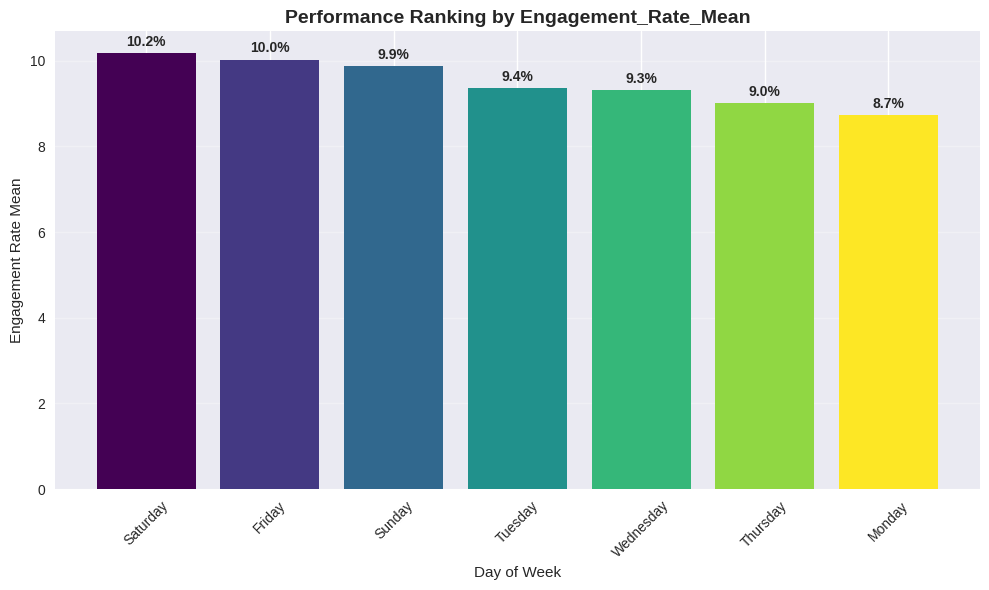

,Day,Total_Posts,Avg_Impressions,Avg_Engagements,Avg_Likes,Engagement_Rate_Mean,Like_Rate_Mean,Reply_Rate_Mean
5,Saturday,38,3434.97,366.45,151.37,10.18,4.30,3.50
4,Friday,42,3171.62,344.17,136.86,10.03,4.01,3.39
6,Sunday,48,4442.04,391.96,152.25,9.88,4.51,2.94
1,Tuesday,57,2641.28,277.56,112.56,9.36,3.95,2.97
2,Wednesday,48,3095.54,307.08,124.10,9.33,3.80,3.04
3,Thursday,66,2096.08,222.36,93.64,9.02,3.68,2.43
0,Monday,52,3069.71,313.56,127.94,8.73,3.64,2.93


In [11]:
# CELL 11: Interactive Summary Function

def analyze_posting_performance(metric='Engagement_Rate_Mean'):
    """
    Interactive function to analyze posting performance by different metrics
    
    Parameters:
    metric (str): Choose from 'Engagement_Rate_Mean', 'Like_Rate_Mean', 'Avg_Impressions', 'Avg_Engagements'
    """
    
    if metric not in summary_stats.columns:
        print(f"❌ Metric '{metric}' not found. Available metrics:")
        print(list(summary_stats.columns[2:]))  # Skip 'Day' and 'Total_Posts'
        return
    
    # Sort by selected metric
    ranked = summary_stats.sort_values(metric, ascending=False)
    
    print(f"🏆 Ranking by {metric}:")
    print("=" * 40)
    
    for i, (_, row) in enumerate(ranked.iterrows(), 1):
        value = row[metric]
        day = row['Day']
        if 'Rate' in metric:
            print(f"{i}. {day}: {value:.2f}%")
        else:
            print(f"{i}. {day}: {value:.0f}")
    
    # Create visualization
    plt.figure(figsize=(10, 6))
    bars = plt.bar(ranked['Day'], ranked[metric], 
                   color=plt.cm.viridis(np.linspace(0, 1, len(ranked))))
    plt.title(f'Performance Ranking by {metric}', fontweight='bold', fontsize=14)
    plt.xlabel('Day of Week')
    plt.ylabel(metric.replace('_', ' '))
    plt.xticks(rotation=45)
    plt.grid(axis='y', alpha=0.3)
    
    # Add value labels
    for bar, value in zip(bars, ranked[metric]):
        height = bar.get_height()
        if 'Rate' in metric:
            plt.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                    f'{value:.1f}%', ha='center', va='bottom', fontweight='bold')
        else:
            plt.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                    f'{value:.0f}', ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    return ranked

# Example usage:
print("🔧 Use the analyze_posting_performance() function to explore different metrics:")
print("analyze_posting_performance('Engagement_Rate_Mean')")
print("analyze_posting_performance('Like_Rate_Mean')")
print("analyze_posting_performance('Avg_Impressions')")

# Run the default analysis
analyze_posting_performance('Engagement_Rate_Mean')